# Evaluation of Multi-Tier Framework for measuring access to cooking solutions: Rwanda

## Importing the useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math
import plotly.express as px

## Importing the dataset

In [2]:
df = pd.read_excel("dataset.xlsx", sheet_name="main_dataset")
section_I = pd.read_excel("dataset.xlsx", sheet_name="I")

## Analysing different Attributes

Attributes which are analysed for MTF_Rwanda_Questionnaire_Household: 

1. **Cooking Exposure**: How is the user’s respiratory health affected? This is based on personal
exposure to pollutants from cooking activities, which depends on stove emissions,
ventilation structure (which includes cooking location and kitchen volume11), and contact
time (time spent in the cooking environment). 
2. Cookstove Efficiency
3. Convenience
4. Safety of Primary Cookstove
5. Affordability 
6. Fuel Availability

## Typologies of cookstoves
Cookstoves in Rwanda were classified into four categories (see annex 2 of the report for detailed information):

- Three-stone stove. A pot balanced on three stones over an open fire. Fuel use and emissions are high, and
thermal efficiency and safety are low. Three-stone stoves usually use firewood, but other solid fuels may
also be used.
- Traditional biomass stove. Locally produced using mud, metal, or other low-cost materials and following
cultural practices. Traditional biomass stoves use biomass fuels. In Rwanda six types of stoves were identified
as traditional: round mud stove, rocket stove, gisafuriya, double and triple movable metal charcoal stove, all
metal stove, and Muyaga.
- Improved biomass stove. Uses newer stove technology to improve efficiency, cleanliness, and safety. Improved
biomass stoves use less energy to deliver a given amount of usable heat than three-stone and traditional
stoves do, and they may also produce less indoor and overall air pollution. Thus, improved biomass stoves
may enable cleaner and more efficient delivery of traditional fuels, though they may not meet emissions or
efficiency standards. Their performance cannot be visually identified, and thus they must be tested. In Rwanda
nine types of improved stoves were identified: Darfour 1, Darfour 2, canarumwe, canamake ivuguruye, canamake
itavuguruye, fixed canamake itavuguruye, double and triple movable (canamake itavuguruye), sawdust/rice
husks stove, and Save80.
- Clean fuel stove. Uses fuels with very low levels of polluting emissions, such as biogas, LPG/cooking gas, electricity,
ethanol, natural gas, and solar. Such fuels often provide high technical performance in emissions and efficiency
that is largely “stove independent.” In Rwanda only biogas and LPG/cooking gas are used by households.

# Attribute: Cooking Exposure

Cooking Exposure is determined using different dimensions:

- **Emissions**: Depending on fuel
- **Ventilation**: In this report ventilation is defined as using a chimney, hood, or other exhaust system while using a stove or having doors or windows in the cooking area
- **Contact time**

The MTF Cooking Exposure (as for Cookstove Efficiency, Fuel Availability, and Safety of Primary Cookstove) has been simplified in the case of Rwanda because
threshold values for each tier have not been approved by a competent agency and there is currently no
system of certification and labelling for cooking solutions in place that could enable easy identification
of cooking solutions during household surveys.



## Emission
To estimate Cooking Exposure, the first step is to determine the tier for emissions for a household
based on its primary and secondary stoves. Each stove that the household uses is classified based
on a combination of the stove design and the primary fuel used with that stove. This classification is
adapted from EnDev’s Cooking Energy System (table 2). For households that use only one stove, the
tier for emissions for that stove is used. For households that use more than one stove (or stack their
stoves), the emissions of each stove are weighted by the proportion of time spent cooking with it. For
the analysis of access to modern energy cooking solutions in Rwanda, households with a three-stone
or traditional stove as their primary stove are in Tier 0, households with an improved cookstove (ICS)
are Tiers 1–3, and households with a clean fuel stove are in Tier 4 or 5. Households that use a clean
fuel stove exclusively are in Tier 5; the tier for households that use a clean fuel stove as their primary
stove and engage in stove stacking was based on the proportion of time spent cooking with each stove.








In [3]:
# primary stove
primary_stoves = section_I.loc[section_I['I3']==1]

fuels_dict = {
    "1": "Kerosene",
    "2": "Coal/lignite",
    "3": "Peat",
    "4": "Charcoal",
    "5": "Wood",
    "6": "Solar",
    "7": "Animal Waste/Dung",
    "8": "Crop Residue/Plant Biomass",
    "9": "Saw Dust",
    "10": "Coal Briquette",
    "11": "Biomass Briquette",
    "12": "Processed biomass (pellets/woodchips)",
    "13": "Ethanol",
    "14": "Biogas",
    "15": "LPG",
    "16": "Piped Natural Gas",
    "17": "Electric",
    "18": "Garbage/plastic",
    "555": "Other"
}


# type of stove and fuels
stoves = []
fuels = []
used_fuels = [  1,   3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  17, 555]
count_fuels = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(df)):
    filtered = primary_stoves.loc[section_I["HHID"]==df["Household Identification"][i]]
    hh_stoves = []
    hh_fuels = []
    hh_fuel_tier = []
    for s in filtered["I2"]:
        hh_stoves.append(s)
    for s in filtered["I18A"]:
        if int(s) not in hh_fuels and len(hh_fuels)==0:
            hh_fuels.append(int(s))
        
        k = used_fuels.index(int(s))
        count_fuels[k]+=1
        
    fuels.append(hh_fuels)
    stoves.append(hh_stoves)
    
    
    
    
fuel_labels = []
for u in used_fuels:
    fuel_labels.append(fuels_dict[str(u)])
    

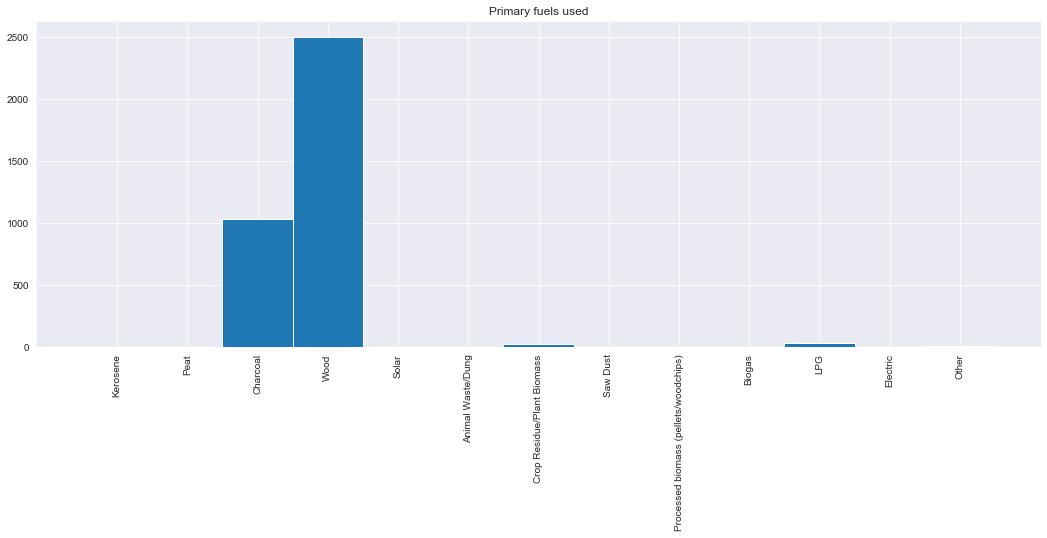

In [4]:
f,ax=plt.subplots(1,1, figsize=(18,6))
ind = np.arange(len(used_fuels))
plt.bar(ind,count_fuels,width=1)
plt.xticks(ind,labels=fuel_labels,rotation=90)
plt.title("Primary fuels used")
plt.show()
    

Emission: Fuel
    
* TIER 0-3: Firewood, dung, twigs, leaves, rice husks, processed biomass pellets or
briquette, charcoal, kerosene
* TIER 4: Biogas, ethanol, high quality processed biomass pellets or briquettes
* TIER 5: Electricity, solar, LPG

In [5]:
df_emission= pd.DataFrame(fuels,columns=['Fuels'])

## Ventilation
The second step is to determine the ventilation for the cooking area, categorized by the location of the
cooking activity. Ventilation is classified into 3 levels: poor, average, and good.

- **Poor** A household that prepares its meals indoors in an area with fewer than two openings
(windows and doors) to the outside is classified as having poor ventilation. 
- **Average** A household that prepares its meals indoors in an area with two or more openings is classified as having average ventilation.
- **Good**: A household that cooks its meals outdoors is classified as having good ventilation. Ventilation
mitigates the indoor air pollution that a household is exposed to by diluting the concentration of
emissions from polluting fuels and expelling the pollutants from the cooking area.

Households in Tier 0 for emissions remain in Tier 0 for Cooking Exposure if they have poor or average
ventilation but move to Tier 1 if they have good ventilation. Households in Tiers 1–3 for emissions
(using a traditional cookstove or ICS) move down one tier for Cooking Exposure if they have bad
ventilation, remain in the same tier if they have average ventilation, and move up one tier if they have
good ventilation. Households in Tier 4 for emissions remain in Tier 4 for Cooking Exposure if they have
poor or average ventilation and move to Tier 5 if they have good ventilation. Households in Tier 5 for
emissions remain in Tier 5 regardless of ventilation. 


In [6]:
Windows=[]
for s in df["I16_How many doors and windows"]:
    Windows.append(s)

df_emission['Windows']= Windows

In [7]:
df_emission['Outdoor']=df[['I14_where did you normally cook with the cookstove']]


In [8]:
df_emission.isnull().sum()

Fuels       77
Windows    948
Outdoor      0
dtype: int64

In [9]:
df_emission.dropna(inplace=True)

In [10]:
df_emission.head()

,Fuels,Windows,Outdoor
0,5.0,6.0,3
4,5.0,1.0,3
5,5.0,1.0,3
6,5.0,2.0,3
10,5.0,2.0,3


## Adding TIER to the dataset

In [11]:
lst=[]
TIER5= [6,15,16,17]
TIER4= [8,10,11,12,13,14]
for i in range (df_emission.shape[0]):
    value=""
    Fuel = int(df_emission.iat[i,0])
    Windows = df_emission.iat[i,1]
    Outdoor = df_emission.iat[i,2]
    if Fuel in TIER5 and Outdoor==5:
        value = "5"
    elif Fuel in TIER4 and Outdoor==5:
        value = "4"
    else:
        value = "0-3"
    lst.append(value)
       
# adding list to dataframe
df_emission["TIER"] = lst

## Visualizing the TIER 

Text(0.5, 1.0, 'TIER levels based on cooking exposure')

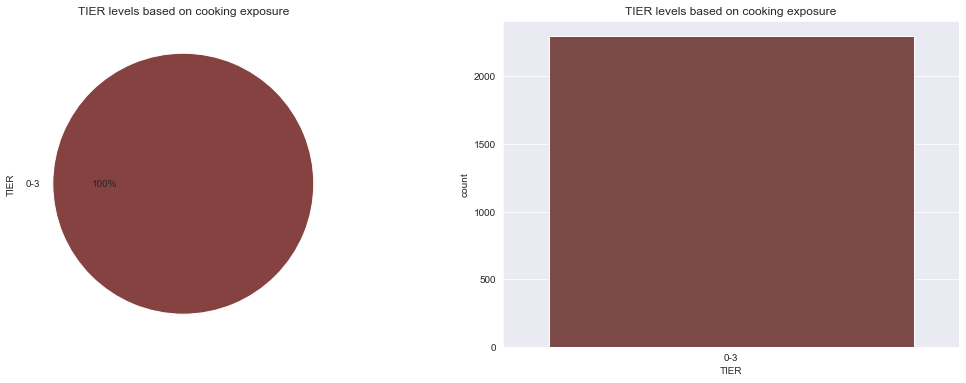

In [12]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_emission['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on cooking exposure')

#Barplot
sns.countplot('TIER',data=df_emission,ax=ax[1])
ax[1].set_title('TIER levels based on cooking exposure')

The above graph states that more than 2000 households that have cooking exposure lies in TIER 0-3

# Attribute: Cookstove Efficiency

Pg 28, No information provided int he dataset/questionnaire

Cookstove Efficiency is low for most households, particularly in rural areas. Because lab testing
results on emissions levels are not available, this report uses a proxy indicator to calculate the
tier for Cookstove Efficiency. Households that use a three-stone or traditional stove are in Tier
0 for Cookstove Efficiency, households that use an ICS are in Tiers 1–3, and households that
use a clean fuel stove are in Tier 5.

# Attribute: Convenience


In [13]:
Match = section_I.loc[section_I['I3']==1]
Time = []
for s in Match["I21"]:
    Time.append(s)

In [14]:
df_convenience=pd.DataFrame(Time,columns=['Time'])

In [15]:
df_convenience = df_convenience.replace(np.nan, 'Missing_data', regex=True)

## Adding TIER to the dataset

In [16]:
def conditions(Time):
    if Time == 'Missing_data':
        return "Missing_data"
    elif Time<2:
        return "5"
    elif 2<=Time<5:
        return "4"
    elif 5<=Time<10:
        return "3"
    elif 10<=Time<15:
        return "2"
    else:
        return "0&1"
    
func = np.vectorize(conditions)
transform = func(df_convenience.Time)
df_convenience["TIER"] = transform

## Visualizing the TIER 

Text(0.5, 1.0, 'TIER levels based on cooking Convenience')

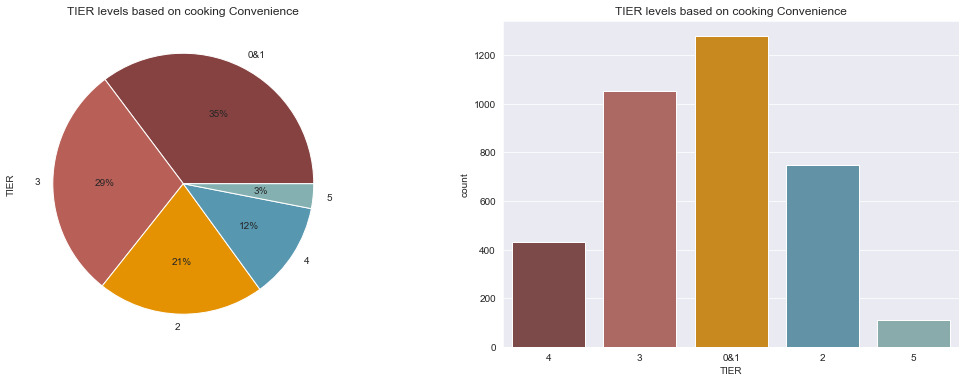

In [17]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_convenience['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on cooking Convenience')

#Barplot
sns.countplot('TIER',data=df_convenience,ax=ax[1])
ax[1].set_title('TIER levels based on cooking Convenience')

The above graph states for Stove preparation time (minutes per meal):
    
1. 35% households take More than 15 minutes to cook (TIER 0&1)
2. 21% households take Less than 15 minutes to cook (TIER 2)
3. 29% households take Less than 10 minutes to cook (TIER 3)
4. 12% households take Less than 5 minutes to cook (TIER 4)
5. 3% households take Less than 2 minutes to cook (TIER 5)


# Attribute: Safety of Primary Cookstove

I31 determines the type of injury. However, nothing provided in the dataset to analyse

In [18]:
Injury_dict = {
    "1": "Death or permanent damage",
    "2": "Burns/fire/poisoning",
    "3": "Severe cough/respiratory problem",
    "4": "Other major injury",
    "5": "Minor injury",
    "6": "Fire with no injury",
    "7": "Itchy/watery eyes",
    "8": "None",
} 

In [19]:
Match = section_I.loc[section_I['I3']==1]
Match['I31']= Match[['I31_1','I31_2','I31_3','I31_4','I31_5','I31_6','I31_7','I31_8']].sum(axis=1)

In [20]:
df_safety= Match[['I31']]

## Adding TIER to the dataset

In [21]:
def conditions(I31):

    TIER1=[1,2,3,4]
    TIER2=[5,6,7,8]
    if I31 in TIER1:
        return "0-3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_safety.I31)
df_safety["TIER"] = transform

## Visualizing the TIER 

Text(0.5, 1.0, 'TIER levels based on Safety of Primary Cookstove')

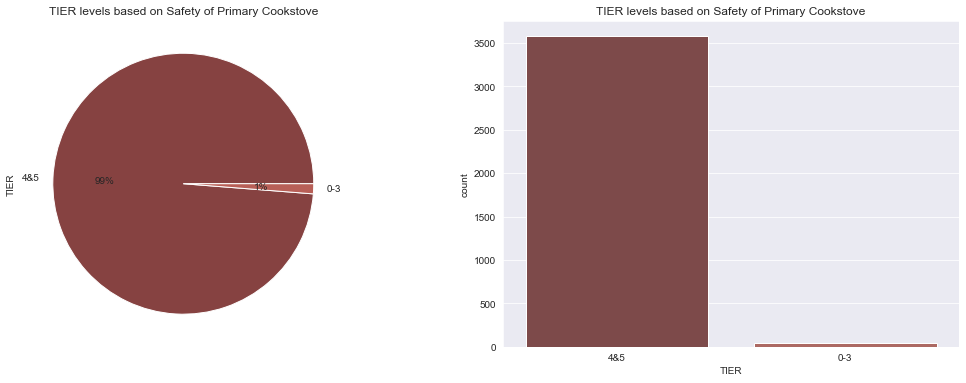

In [22]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_safety['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on Safety of Primary Cookstove')

#Barplot
sns.countplot('TIER',data=df_safety,ax=ax[1])
ax[1].set_title('TIER levels based on Safety of Primary Cookstove')

The above graph states for Safety of Primary Cookstove:

1. 1% of the housholds are seriously affected by accidents over the past 12 months (TIER 0-3)
2. 99% of the housholds were not seriously affected by accidents over the past 12 months (TIER4-5)


# Attribute: Affordability 

(Pg 40, Affordability could not be calculated for Rwanda because the survey was not able to collect expenditure information)

(Pg 95, In this report, cookstove cost was not considered when calculating the Affordability tier due to data limitations which hindered making this calculation.)

# Attribute: Fuel Availability

No information provided in the report, survey or the dataset.

In [23]:
Match = section_I.loc[section_I['I3']==1]
Availability = []
for s in Match["I19A"]:
    Availability.append(s)

In [24]:
df_availability=pd.DataFrame(Availability,columns=['Availability'])

In [25]:
Availability = {
    "1": "Always available",
    "2": "Mostly available",
    "3": "Sometimes available",
    "4": "Rarely available",
} 

## Adding TIER to the dataset

In [26]:
def conditions(Availability):

    if Availability==1:
        return "5"
    elif Availability==2:
        return '4'
    else:
        return "0-3"
    
func = np.vectorize(conditions)
transform = func(df_availability.Availability)
df_availability["TIER"] = transform

## Visualizing the TIER 

Text(0.5, 1.0, 'TIER levels based on Fuel Availability')

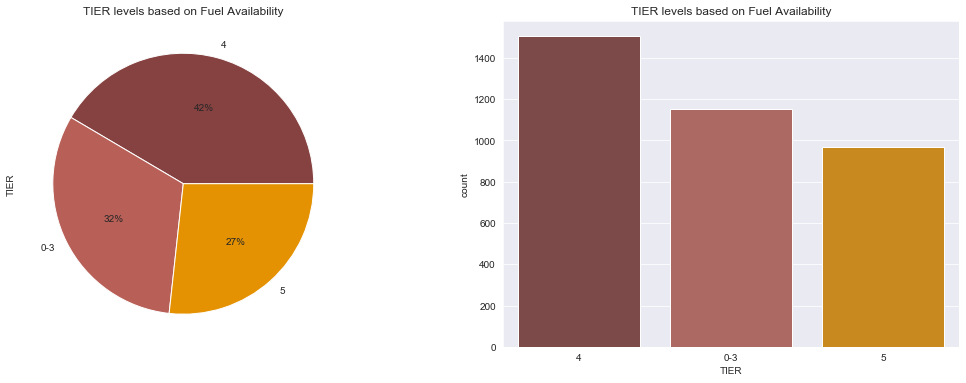

In [27]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_availability['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on Fuel Availability')

#Barplot
sns.countplot('TIER',data=df_availability,ax=ax[1])
ax[1].set_title('TIER levels based on Fuel Availability')

The above graph states for Fuel Availability:

1. Primary fuel is available to 32% households less than 80% of the year (TIER 0-3)
2. Primary fuel is readily available to 42% households 80% of the year (TIER 4)
3. Primary fuel is readily available to 27% housholds throughout the year (TIER 5)